In [69]:
from __future__ import print_function, division
import mdtraj as md
from mdtraj.utils import ensure_type
from mdtraj.geometry import compute_distances, compute_angles
from mdtraj.geometry import _geometry
import os
import sys
import numpy as np
import pandas as pd
import scipy 
from scipy import optimize
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math
import itertools 
import pickle
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import pyblock
from mdtraj.geometry import _geometry
from mdtraj.utils import ensure_type
from mdtraj.geometry import compute_distances, compute_angles
from scipy.stats import pearsonr
#from matplotlib import 

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyinform

In [5]:
def residence_events(data:np.ndarray, condition:"a python function that returns true when a condition on data is met")->list:
    """returns a list of numpy arrays containing the indices (of the zeroth dim) of data where a condition is met contiguously"""
    idx = np.arange(len(data))
    bools = condition(data).astype(int)
    comp = np.stack([idx,bools],axis = 1)
    return [i[:,0][1:] if len(i)>1 else i[:,0] for i in filter(lambda x:any(x[:,1]!=0),np.split(comp,np.where(comp[:,1]==0)[0]))]

#example of a really simple condition one could place on data if it is a 1 dimensional array
#the array doesn't have to be one dimensional, and you can add as many conditions as you want so long as the output
#is a bool array the same length as the zeroth dimension of the input

#as an example, we'll use the following array for data argument
#data = np.array([1,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,1,1,1,1,1,])
#and a simple condition
def condition(x):
    return 0<np.where(x<.6,1,0).sum(1)

In [6]:
dmat = np.load("/data/asn/tica/lig_47/dist/distance_matrix_full_LIG.npy")

(1100889, 1)


array([0.2725, 0.2585, 0.2535, 0.201 , 0.1965])

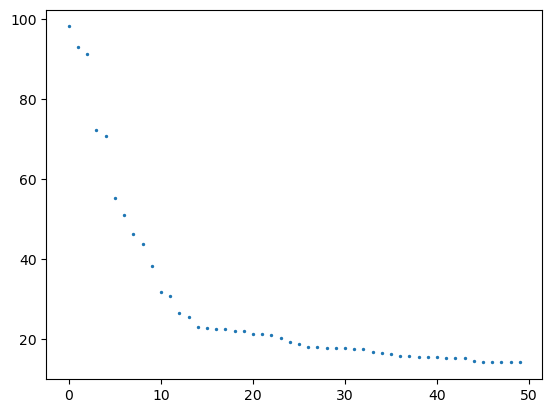

In [27]:
dmat_1 = dmat[:, :1]
print(dmat_1.shape)

events_1 = residence_events(dmat_1,condition)
#check that it's correct

residence_time_1 = np.sort(np.array([len(i) for i in events_1]))[::-1]

plt.scatter(np.arange(50), residence_time_1[:50]*180e-3, s = 2)

residence_time_1[:5]/2000

(1100889, 1)


array([0.2725, 0.2585, 0.2535, 0.201 , 0.1965])

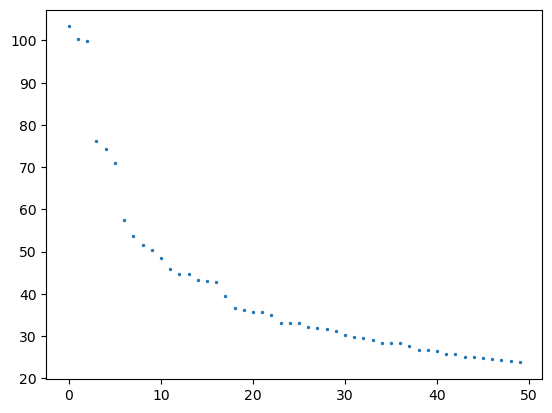

In [28]:
dmat_2 = dmat[:, 1:2]
print(dmat_2.shape)

events_2 = residence_events(dmat_2,condition)
#check that it's correct

residence_time_2 = np.sort(np.array([len(i) for i in events_2]))[::-1]

plt.scatter(np.arange(50), residence_time_2[:50]*180e-3, s = 2)

residence_time_1[:5]/2000

(1100889, 1)


array([0.287 , 0.279 , 0.2775, 0.2115, 0.2065])

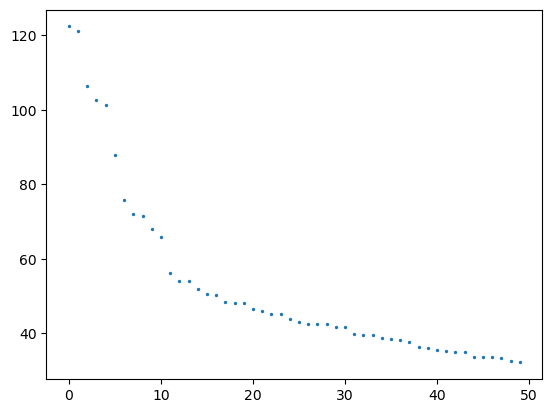

In [29]:
dmat_3 = dmat[:, 2:3]
print(dmat_3.shape)

events_3 = residence_events(dmat_3,condition)
#check that it's correct

residence_time_3 = np.sort(np.array([len(i) for i in events_3]))[::-1]

plt.scatter(np.arange(50), residence_time_3[:50]*180e-3, s = 2)

residence_time_2[:5]/2000

(1100889, 1)


array([0.287 , 0.279 , 0.2775, 0.2115, 0.2065])

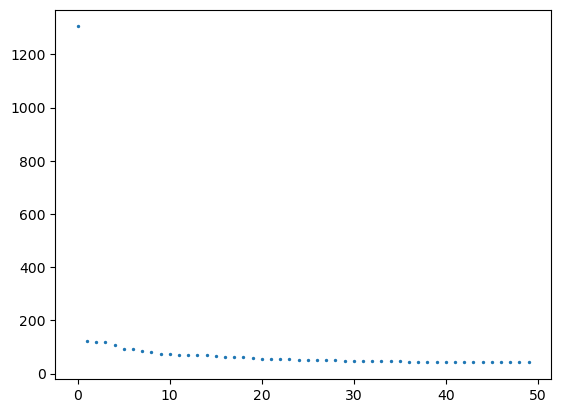

In [30]:
dmat_4 = dmat[:, 3:4]
print(dmat_4.shape)

events_4 = residence_events(dmat_4,condition)
#check that it's correct

residence_time_4 = np.sort(np.array([len(i) for i in events_4]))[::-1]

plt.scatter(np.arange(50), residence_time_4[:50]*180e-3, s = 2)

residence_time_2[:5]/2000

(1100889, 1)


array([0.34  , 0.337 , 0.2955, 0.285 , 0.2815])

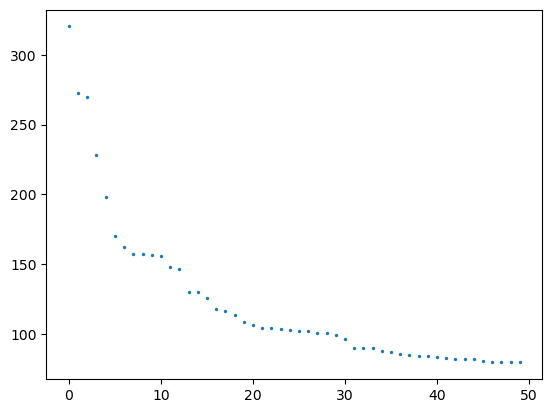

In [31]:
dmat_5 = dmat[:, 4:5]
print(dmat_5.shape)

events_5 = residence_events(dmat_5,condition)
#check that it's correct

residence_time_5 = np.sort(np.array([len(i) for i in events_5]))[::-1]

plt.scatter(np.arange(50), residence_time_5[:50]*180e-3, s = 2)

residence_time_3[:5]/2000

(1100889, 1)


array([0.287 , 0.279 , 0.2775, 0.2115, 0.2065])

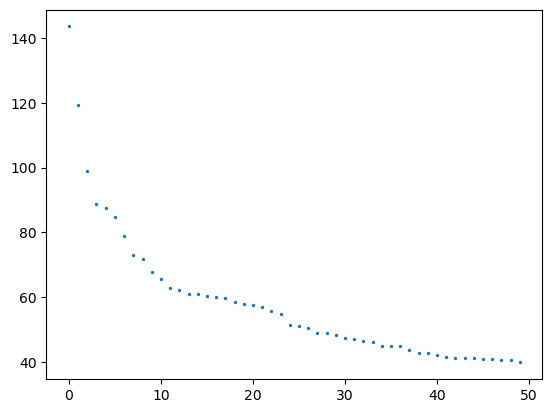

In [32]:
dmat_6 = dmat[:, 5:6]
print(dmat_6.shape)

events_6 = residence_events(dmat_6,condition)
#check that it's correct

residence_time_6 = np.sort(np.array([len(i) for i in events_6]))[::-1]

plt.scatter(np.arange(50), residence_time_6[:50]*180e-3, s = 2)

residence_time_2[:5]/2000

(1100889, 1)


array([3.626 , 0.344 , 0.3315, 0.3275, 0.298 ])

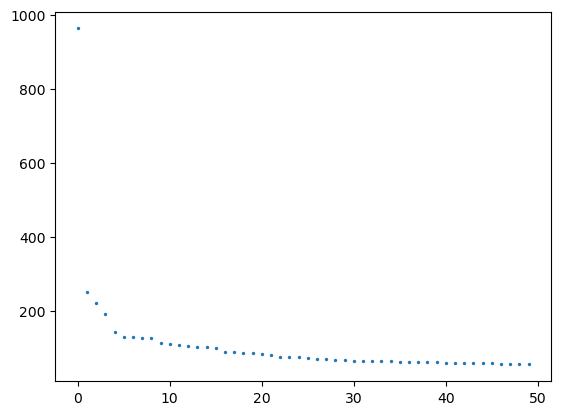

In [33]:
dmat_7 = dmat[:, 6:7]
print(dmat_7.shape)

events_7 = residence_events(dmat_7,condition)
#check that it's correct

residence_time_7 = np.sort(np.array([len(i) for i in events_7]))[::-1]

plt.scatter(np.arange(50), residence_time_7[:50]*180e-3, s = 2)

residence_time_4[:5]/2000

(1100889, 1)


array([3.626 , 0.344 , 0.3315, 0.3275, 0.298 ])

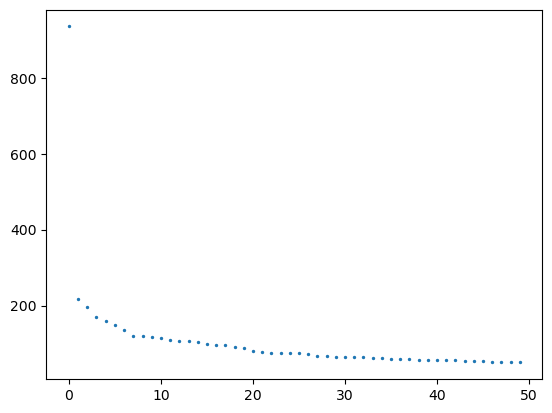

In [34]:
dmat_8 = dmat[:, 7:8]
print(dmat_8.shape)

events_8 = residence_events(dmat_8,condition)
#check that it's correct

residence_time_8 = np.sort(np.array([len(i) for i in events_8]))[::-1]

plt.scatter(np.arange(50), residence_time_8[:50]*180e-3, s = 2)

residence_time_4[:5]/2000

(1100889, 1)


array([0.89  , 0.7565, 0.75  , 0.6335, 0.551 ])

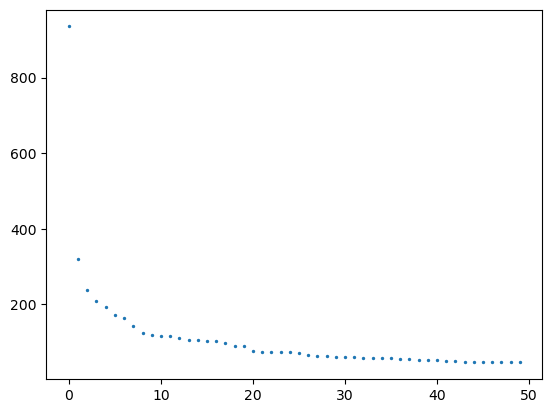

In [35]:
dmat_9 = dmat[:, 8:9]
print(dmat_9.shape)

events_9 = residence_events(dmat_9,condition)
#check that it's correct

residence_time_9 = np.sort(np.array([len(i) for i in events_9]))[::-1]

plt.scatter(np.arange(50), residence_time_9[:50]*180e-3, s = 2)

residence_time_5[:5]/2000

(1100889, 1)


array([0.89  , 0.7565, 0.75  , 0.6335, 0.551 ])

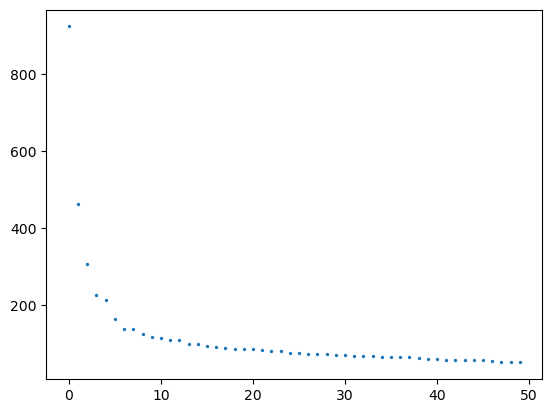

In [36]:
dmat_10 = dmat[:, 9:10]
print(dmat_10.shape)

events_10 = residence_events(dmat_10,condition)
#check that it's correct

residence_time_10 = np.sort(np.array([len(i) for i in events_10]))[::-1]

plt.scatter(np.arange(50), residence_time_10[:50]*180e-3, s = 2)

residence_time_5[:5]/2000

(1100889, 1)


array([0.399 , 0.3315, 0.2745, 0.2465, 0.243 ])

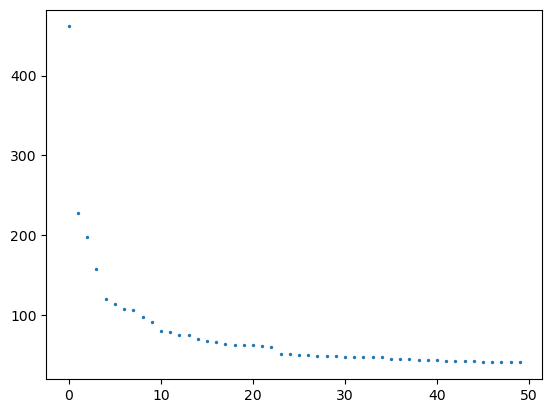

In [37]:
dmat_11 = dmat[:, 10:11]
print(dmat_11.shape)

events_11 = residence_events(dmat_11,condition)
#check that it's correct

residence_time_11 = np.sort(np.array([len(i) for i in events_11]))[::-1]

plt.scatter(np.arange(50), residence_time_11[:50]*180e-3, s = 2)

residence_time_6[:5]/2000

(1100889, 1)


array([0.399 , 0.3315, 0.2745, 0.2465, 0.243 ])

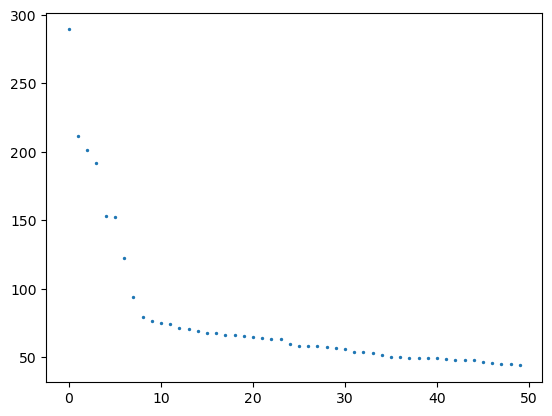

In [38]:
dmat_12 = dmat[:, 11:12]
print(dmat_12.shape)

events_12 = residence_events(dmat_12,condition)
#check that it's correct

residence_time_12 = np.sort(np.array([len(i) for i in events_12]))[::-1]

plt.scatter(np.arange(50), residence_time_12[:50]*180e-3, s = 2)

residence_time_6[:5]/2000

(1100889, 1)


array([2.6755, 0.6945, 0.6095, 0.527 , 0.395 ])

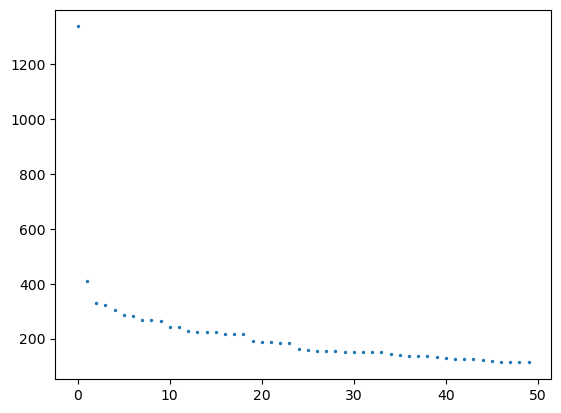

In [39]:
dmat_13 = dmat[:, 12:13]
print(dmat_13.shape)

events_13 = residence_events(dmat_13,condition)
#check that it's correct

residence_time_13 = np.sort(np.array([len(i) for i in events_13]))[::-1]

plt.scatter(np.arange(50), residence_time_13[:50]*180e-3, s = 2)

residence_time_7[:5]/2000

(1100889, 1)


array([2.6755, 0.6945, 0.6095, 0.527 , 0.395 ])

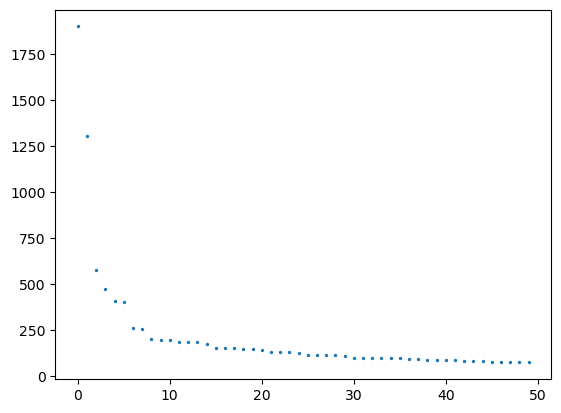

In [40]:
dmat_14 = dmat[:, 13:14]
print(dmat_14.shape)

events_14 = residence_events(dmat_14,condition)
#check that it's correct

residence_time_14 = np.sort(np.array([len(i) for i in events_14]))[::-1]

plt.scatter(np.arange(50), residence_time_14[:50]*180e-3, s = 2)

residence_time_7[:5]/2000

(1100889, 1)


array([2.5985, 0.606 , 0.5415, 0.47  , 0.446 ])

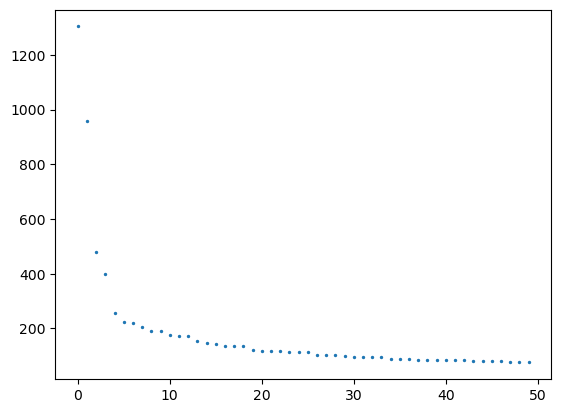

In [41]:
dmat_15 = dmat[:, 14:15]
print(dmat_15.shape)

events_15 = residence_events(dmat_15,condition)
#check that it's correct

residence_time_15 = np.sort(np.array([len(i) for i in events_15]))[::-1]

plt.scatter(np.arange(50), residence_time_15[:50]*180e-3, s = 2)

residence_time_8[:5]/2000

(1100889, 1)


array([2.5985, 0.606 , 0.5415, 0.47  , 0.446 ])

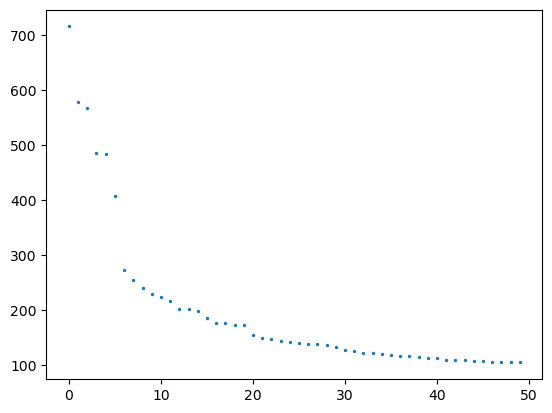

In [42]:
dmat_16 = dmat[:, 15:16]
print(dmat_16.shape)

events_16 = residence_events(dmat_16,condition)
#check that it's correct

residence_time_16 = np.sort(np.array([len(i) for i in events_16]))[::-1]

plt.scatter(np.arange(50), residence_time_16[:50]*180e-3, s = 2)

residence_time_8[:5]/2000

(1100889, 1)


array([2.597 , 0.8895, 0.6585, 0.584 , 0.54  ])

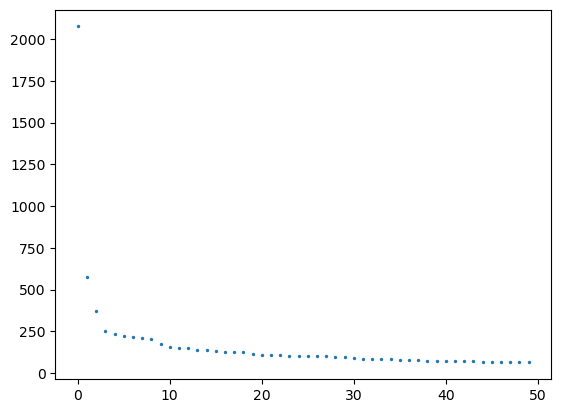

In [43]:
dmat_17 = dmat[:, 16:17]
print(dmat_17.shape)

events_17 = residence_events(dmat_17,condition)
#check that it's correct

residence_time_17 = np.sort(np.array([len(i) for i in events_17]))[::-1]

plt.scatter(np.arange(50), residence_time_17[:50]*180e-3, s = 2)

residence_time_9[:5]/2000

(1100889, 1)


array([2.597 , 0.8895, 0.6585, 0.584 , 0.54  ])

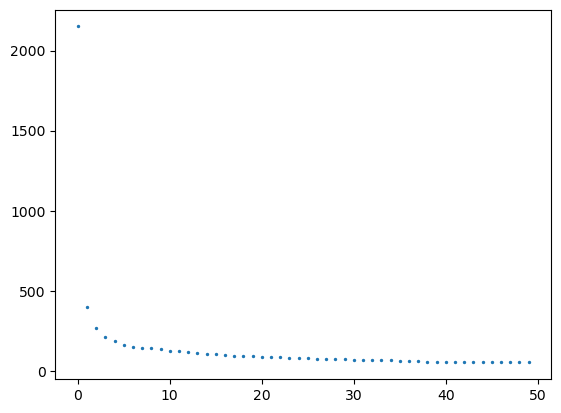

In [44]:
dmat_18 = dmat[:, 17:18]
print(dmat_18.shape)

events_18 = residence_events(dmat_18,condition)
#check that it's correct

residence_time_18 = np.sort(np.array([len(i) for i in events_18]))[::-1]

plt.scatter(np.arange(50), residence_time_18[:50]*180e-3, s = 2)

residence_time_9[:5]/2000

(1100889, 1)


array([2.565 , 1.2825, 0.8485, 0.627 , 0.592 ])

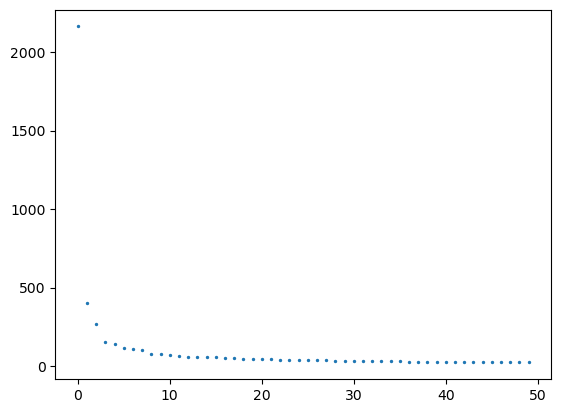

In [45]:
dmat_19 = dmat[:, 18:19]
print(dmat_19.shape)

events_19 = residence_events(dmat_19,condition)
#check that it's correct

residence_time_19 = np.sort(np.array([len(i) for i in events_19]))[::-1]

plt.scatter(np.arange(50), residence_time_19[:50]*180e-3, s = 2)

residence_time_10[:5]/2000

(1100889, 1)


array([2.565 , 1.2825, 0.8485, 0.627 , 0.592 ])

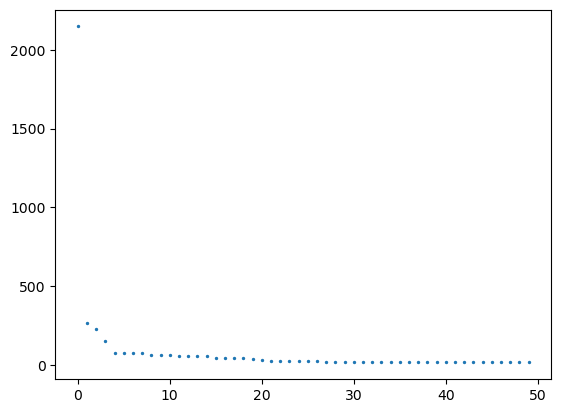

In [46]:
dmat_20 = dmat[:, 19:20]
print(dmat_20.shape)

events_20 = residence_events(dmat_20,condition)
#check that it's correct

residence_time_20 = np.sort(np.array([len(i) for i in events_20]))[::-1]

plt.scatter(np.arange(50), residence_time_20[:50]*180e-3, s = 2)

residence_time_10[:5]/2000

In [83]:
def overlapped_bar(df, show=False, width=0.9, alpha=.5,
                   title='', xticks='', yticks= '', xlabel='', ylabel='', **plot_kwargs):
    """Like a stacked bar chart except bars on top of each other with transparency"""
    #xlabel = xlabel or df.index.name
    N = len(df)
    M = len(df.columns)
    indices = np.arange(N)
    colors = ['steelblue', 'firebrick', 'darksage', 'goldenrod', 'gray'] * int(M / 5. + 1)
    for i, label, color in zip(range(M), df.columns, colors):
        kwargs = plot_kwargs
        kwargs.update({'color': color, 'label': label})
        plt.bar(indices, df[label], width=width, alpha=alpha if i else 1, **kwargs)
        plt.xticks(indices + .5 * width,
                   ['{}'.format(idx) for idx in df.index.values])
    plt.legend()
    plt.xticks
    plt.yticks
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if show:
        plt.show()
    return plt.gcf()

In [97]:
high = [residence_time_1[0], residence_time_2[0], residence_time_3[0], residence_time_4[0], residence_time_5[0] ,residence_time_6[0],residence_time_7[0], residence_time_8[0], residence_time_9[0], residence_time_10[0], residence_time_11[0], residence_time_12[0], residence_time_13[0], residence_time_14[0], residence_time_15[0], residence_time_16[0], residence_time_17[0], residence_time_18[0], residence_time_19[0], residence_time_20[0]]

In [98]:
high

[545,
 574,
 680,
 7252,
 1780,
 798,
 5351,
 5197,
 5194,
 5130,
 2565,
 1608,
 7431,
 10557,
 7245,
 3980,
 11525,
 11946,
 12014,
 11929]

In [99]:
low = [residence_time_1[1], residence_time_2[1], residence_time_3[1], residence_time_4[1], residence_time_5[1] ,residence_time_6[1],residence_time_7[1], residence_time_8[1], residence_time_9[1], residence_time_10[1], residence_time_11[1], residence_time_12[1], residence_time_13[1], residence_time_14[1], residence_time_15[1], residence_time_16[1], residence_time_17[1], residence_time_18[1], residence_time_19[1], residence_time_20[1]]

In [100]:
low

[517,
 558,
 674,
 688,
 1513,
 663,
 1389,
 1212,
 1779,
 2565,
 1263,
 1177,
 2279,
 7245,
 5321,
 3213,
 3212,
 2216,
 2230,
 1484]

In [101]:
#low = [1000.95, 1233.37, 1198.97, 1198.01, 1214.29, 1130.86, 1138.70, 1104.12, 1012.95, 1000.36]
res_ = ('D','N','E','A','Y','E','M','P','S','E','E','G','Y','Q','D','Y','E','P','E','A')
#high = [1184.53, 1523.48, 1521.05, 1517.88, 1519.88, 1414.98, 1419.34, 1415.13, 1182.70, 1165.17]
df = pd.DataFrame(np.matrix([high, low]).T, columns=['High', 'Low'],
                  index=pd.Index(['T%s' %i for i in range(len(high))],
                  name='Index'))
#overlapped_bar(df, xticks= res_, show=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


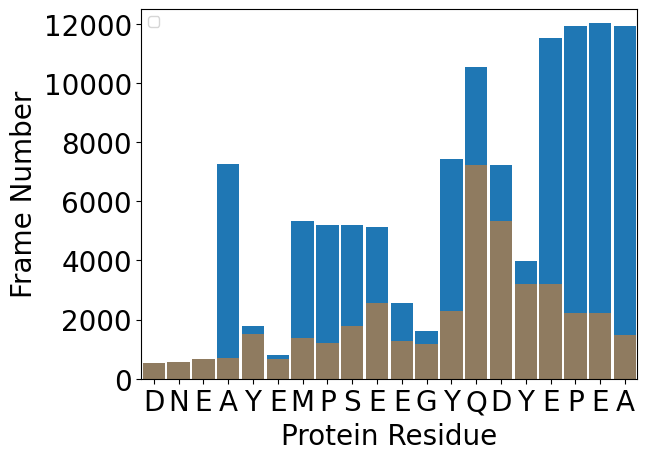

In [112]:
N = len(df)
M = len(df.columns)
indices = np.arange(N)
colors = ['steelblue', 'firebrick', 'darksage', 'goldenrod', 'gray'] * int(M / 5. + 1)
for i, label, color in zip(range(M), df.columns, colors):
    #kwargs = plot_kwargs
    #kwargs.update({'color': color, 'label': label})
    plt.bar(indices, df[label], width=0.9, alpha=.5 if i else 1)
    plt.xticks(indices + .5 * 0.9,
                   ['{}'.format(idx) for idx in df.index.values])
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],res_, fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.5,19.5)
plt.ylim(0,12500)
#plt.title(title)
plt.xlabel('Protein Residue', fontsize=20)
plt.ylabel('Frame Number', fontsize=20)
plt.show()